# Análise geográfica

Este notebook terá foco na análise por cidade/região.

---
### Análise inicial dos dados

In [1]:
import pandas as pd

df = pd.read_csv('/home/l-tiezerin/mentoria_dados/data_tables/starting_df.csv')
df.head()

Gender  Age Married  Number of Dependents          City  Zip Code  \
0  Female   37     Yes                     0  Frazier Park     93225   
1    Male   46      No                     0      Glendale     91206   
2    Male   50      No                     0    Costa Mesa     92627   
3    Male   78     Yes                     0      Martinez     94553   
4  Female   75     Yes                     0     Camarillo     93010   

    Latitude   Longitude  Number of Referrals  Tenure in Months  ...  \
0  34.827662 -118.999073                    2                 9  ...   
1  34.162515 -118.203869                    0                 9  ...   
2  33.645672 -117.922613                    0                 4  ...   
3  38.014457 -122.115432                    1                13  ...   
4  34.227846 -119.079903                    3                 3  ...   

    Payment Method Monthly Charge  Total Charges Total Refunds  \
0      Credit Card           65.6         593.30          0.00   
1      Credit Card           -4.0         542.40         38.33   
2  Bank Withdrawal           73.9         280.85          0.00   
3  Bank Withdrawal           98.0        1237.85          0.00   
4      Credit Card           83.9         267.40          0.00   

  Total Extra Data Charges Total Long Distance Charges  Total Revenue  \
0                        0                      381.51         974.81   
1                       10                       96.21         610.28   
2                        0                      134.60         415.45   
3                        0                      361.66        1599.51   
4                        0                       22.14         289.54   

  Customer Status   Churn Category                   Churn Reason  
0          Stayed          IS NULL                        IS NULL  
1          Stayed          IS NULL                        IS NULL  
2         Churned       Competitor  Competitor had better devices  
3         Churned  Dissatisfaction        Product dissatisfaction  
4         Churned  Dissatisfaction            Network reliability  

[5 rows x 37 columns]

In [2]:
# verificando a quantidade de cidades diferentes constando na base
df['City'].nunique()

1106

São muitas cidades diferentes para se analisar (1.106). Há concentração de clientes em alguma?

In [3]:
# verificando a proporção de clientes por cidade
df['City'].value_counts(normalize=True)*100

City
Los Angeles         4.160159
San Diego           4.046571
San Jose            1.590231
Sacramento          1.533437
San Francisco       1.476643
                      ...   
Eldridge            0.028397
Holtville           0.028397
Johannesburg        0.028397
South Lake Tahoe    0.028397
Jacumba             0.028397
Name: proportion, Length: 1106, dtype: float64

De cara é possível notar uma dispersão muito grande. A partir da terceira cidade em diante, a concentração fica em torno de 1%. As coordenadas podem ajudar a evidenciar possíveis concentrações em regiões específicas?

---
### Separação por áreas

*Tentei IA para montar um heatmap para as coordenadas, porém não deu certo. KDE plot também não deu no Altair.*

In [63]:

heatmap = (
    alt.Chart(df)
    # Cria bins para longitude e latitude
    .transform_bin('binned_longitude', field='Longitude', bin=alt.Bin(maxbins=1))
    .transform_bin('binned_latitude', field='Latitude', bin=alt.Bin(maxbins=1))
    # Conta quantas ocorrências existem em cada combinação de bin
    .transform_aggregate(
        count='count()',
        groupby=['binned_longitude', 'binned_latitude']
    )
    # Cria o gráfico de retângulos
    .mark_rect()
    .encode(
        x=alt.X('binned_longitude:Q', bin='binned', title='Longitude'),
        y=alt.Y('binned_latitude:Q', bin='binned', title='Latitude'),
        color=alt.Color('count:Q', scale=alt.Scale(scheme='inferno'), title='Contagem')
    )
)
heatmap

SchemaValidationError: '1' is an invalid value for `maxbins`.

1 is less than the minimum of 2

In [57]:
# visualizando clientes e status geograficamente
import altair as alt
alt.data_transformers.disable_max_rows()

min_longitude = df['Longitude'].min() * 1.01
max_longitude = df['Longitude'].max() * .99
min_latitude = df['Latitude'].min() * .99
max_latitude = df['Latitude'].max() * 1.01

domain_longitude = [min_longitude, max_longitude]
domain_latitude = [min_latitude, max_latitude]

scatter1 = (
    alt.Chart(data=df)
    .mark_circle(size=20)
    .encode(
        x=alt.X('Longitude:Q', scale=alt.Scale(domain=domain_longitude)),
        y=alt.Y('Latitude:Q', scale=alt.Scale(domain=domain_latitude))
    )
).interactive()

heatmap = (
    alt.Chart(data=df)
    .transform_bin('binned_longitude', field='Longitude', bin=alt.Bin(maxbins=60))
    .transform_bin('binned_latitude', field='Latitude', bin=alt.Bin(maxbins=60))
    .transform_aggregate(
        count='count()',
        groupby=['binned_longitude', 'binned_latitude']
    )
    .mark_rect()
    .encode(
        x=alt.X('binned_longitude:Q', scale=alt.Scale(domain=domain_longitude)),
        y=alt.Y('binned_latitude:Q', scale=alt.Scale(domain=domain_latitude)),
        color=alt.Color('count:Q', scale=alt.Scale(scheme='yellowgreenblue'))
    )
).interactive()

heatmap2 = (
    alt.Chart(df)
    .mark_rect()
    .encode(
        x=alt.X('Longitude:Q', scale=alt.Scale(domain=domain_longitude)),
        y=alt.Y('Latitude:Q', scale=alt.Scale(domain=domain_latitude)),
        color=alt.Color('count(Longitude):Q')
    )
)

heatmap2

alt.Chart(...)

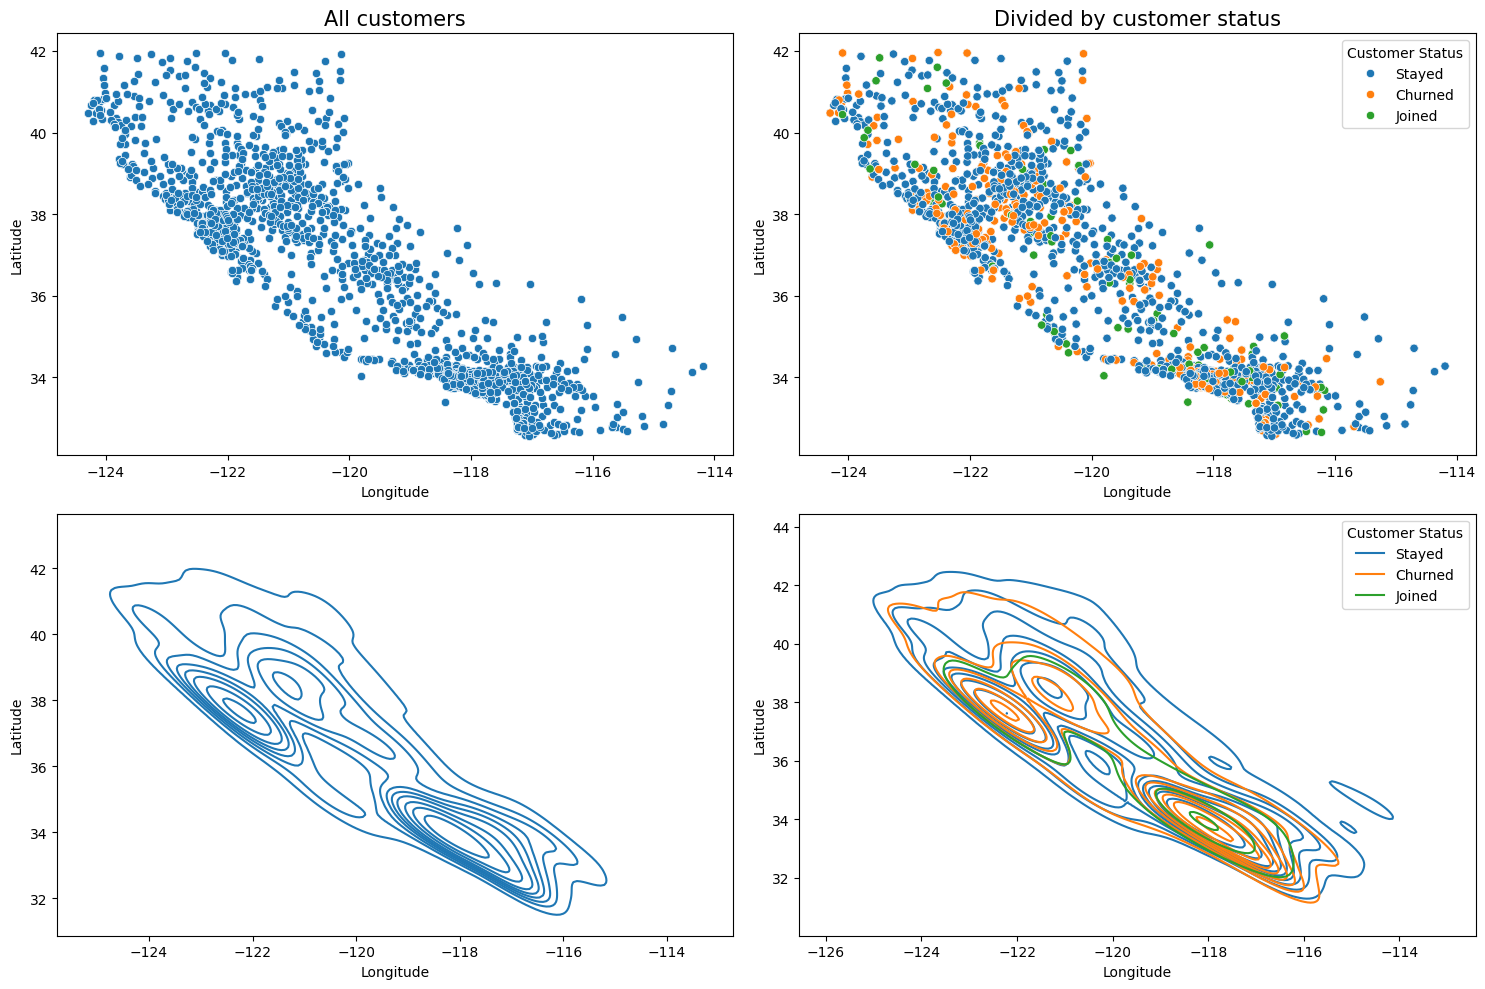

In [4]:
# visualizando clientes e status geograficamente
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10), tight_layout=True)
axs = axs.flatten()

axs[0].set_title('All customers', size=15)
axs[1].set_title('Divided by customer status', size=15)

sns.scatterplot(data=df, x='Longitude', y='Latitude', ax=axs[0])
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Customer Status', ax=axs[1])

sns.kdeplot(data=df, x='Longitude', y='Latitude', ax=axs[2])
sns.kdeplot(data=df, x='Longitude', y='Latitude', hue='Customer Status', ax=axs[3])

plt.show()

O mapa possui três focos, dois ao norte e um ao sul. As classificações dos clientes parecem estar bem distribuídas nas três áreas, não aparentando maior concentração em uma ou outra. Vou dividir essas áreas da seguinte forma:

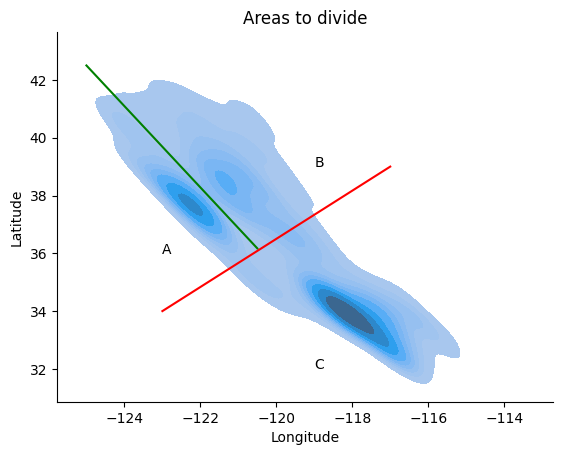

In [8]:
x1= [-125, -120.5]
y1 = [42.5, 36.17]

x2= [-123, -117]
y2 = [34, 39]

def remove_spines(axs):
    for spine in ['top', 'right']:
        axs.spines[spine].set_visible(False)

fig, axs = plt.subplots()

sns.kdeplot(data=df, x='Longitude', y='Latitude', fill=True, linewidth=0, ax=axs)
sns.lineplot(x=x1, y=y1, c='green', ax=axs)
sns.lineplot(x=x2, y=y2, c='red', ax=axs)
axs.annotate('A', [-123, 36])
axs.annotate('B', [-119, 39])
axs.annotate('C', [-119, 32])
axs.set_title('Areas to divide')
remove_spines(axs=axs)
plt.show()

Essa seria a separação que imaginei, dividindo em três áreas de acordo com a densidade dos pontos.

Tentei usar o KMeans e o DBscan, porém não ficou do jeito que eu queria. Portanto, vou definir as áreas de acordo com as posições dos clientes referentes às retas desenhadas.

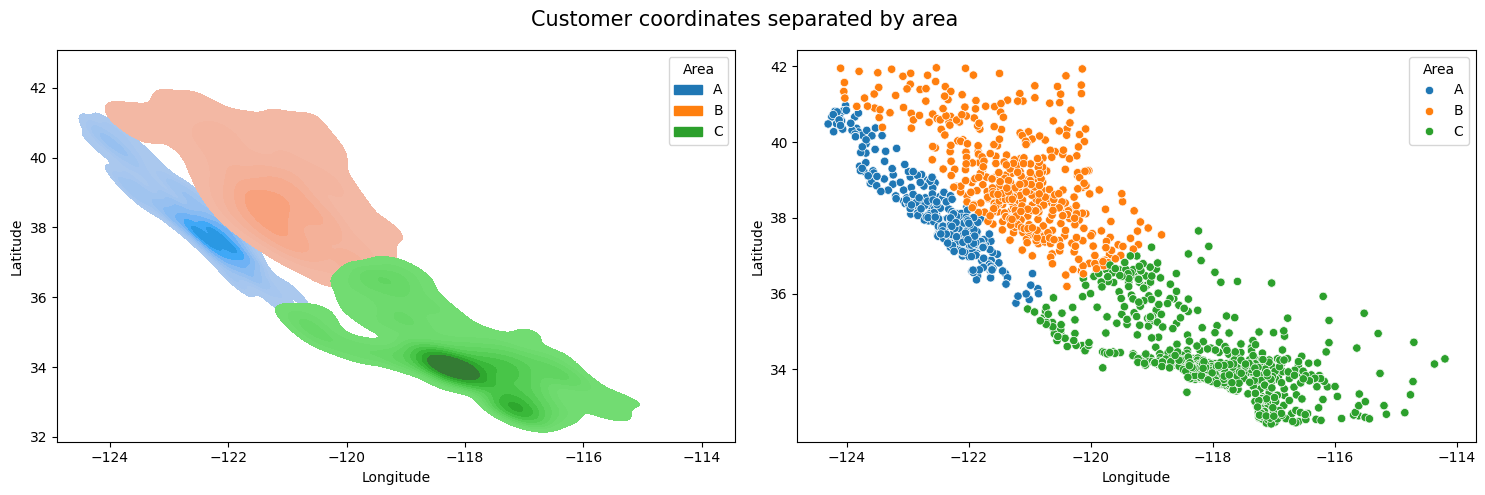

In [6]:
# utilizando condições junto com a função da reta encontrada manualmente
# m: coeficiente angular
# b: intercepto

m_red = (39 - 34) / (-117 - (-123))   
b_red = 34 - m_red * (-123)            
m_green = (36.17 - 42.5) / (-120.5 - (-125))
b_green = 42.5 - m_green * (-125)

areas = []
order_areas = ['A', 'B', 'C']

for _, row in df.iterrows():
    y_red = m_red * row['Longitude'] + b_red
    y_green = m_green * row['Longitude'] + b_green

    if row['Latitude'] <= y_red:
        areas.append('C')
    elif row['Latitude'] <= y_green:
        areas.append('A')
    else:
        areas.append('B')
        
df['Area'] = areas

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.kdeplot(data=df, x='Longitude', y='Latitude', hue='Area', hue_order=order_areas, fill=True, linewidth=0, ax=axs[0])
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Area', hue_order=order_areas, ax=axs[1])
fig.suptitle('Customer coordinates separated by area', size=15)
plt.tight_layout()
plt.show()

---
### Análise qualitativa

-> **Há diferença do status por área?**

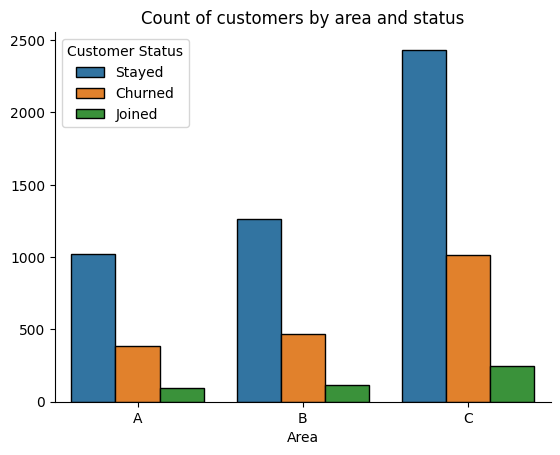

Area A


Customer Status
Stayed     68.042610
Churned    25.699068
Joined      6.258322
Name: proportion, dtype: float64


Area B


Customer Status
Stayed     68.472373
Churned    25.406284
Joined      6.121343
Name: proportion, dtype: float64


Area C


Customer Status
Stayed     65.872801
Churned    27.442490
Joined      6.684709
Name: proportion, dtype: float64

In [10]:
fig, axs = plt.subplots()

sns.countplot(data=df, x='Area', hue='Customer Status', order=order_areas, edgecolor='black', ax=axs)
axs.set_title('Count of customers by area and status')
axs.set_ylabel(None)
remove_spines(axs)
plt.show()

for area in order_areas:
    print(f'Area {area}')
    display(df[df['Area']==area]['Customer Status'].value_counts(normalize=True)*100)
    print()

A proporção do status é praticamente igual para todas as áreas.

-> **A categoria do churn é igual para todas as áreas?**

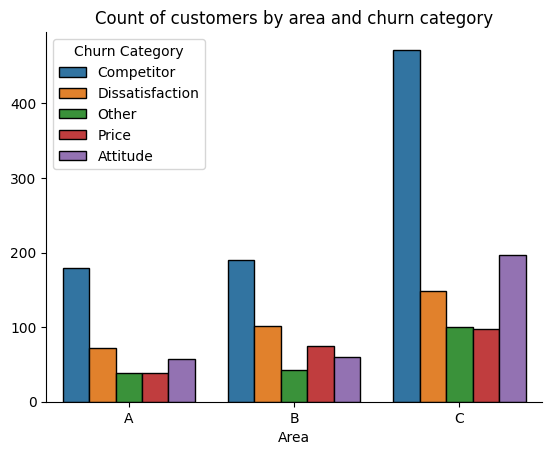

Area A


Churn Category
Competitor         46.373057
Dissatisfaction    18.652850
Attitude           14.766839
Price              10.103627
Other              10.103627
Name: proportion, dtype: float64


Area B


Churn Category
Competitor         40.511727
Dissatisfaction    21.535181
Price              15.991471
Attitude           12.793177
Other               9.168443
Name: proportion, dtype: float64


Area C


Churn Category
Competitor         46.548323
Attitude           19.428008
Dissatisfaction    14.595661
Other               9.861933
Price               9.566075
Name: proportion, dtype: float64

In [ ]:
fig, axs = plt.subplots()

sns.countplot(
    data=df[df['Customer Status']=='Churned'], 
    x='Area', 
    hue='Churn Category', 
    order=order_areas, edgecolor='black',
    ax=axs
)
axs.set_title('Count of customers by area and churn category')
axs.set_ylabel(None)
remove_spines(axs)
plt.show()

for area in order_areas:
    print(f'Area {area}')
    display(
        df[(df['Area']==area) & (df['Customer Status']=='Churned')]['Churn Category']
           .value_counts(normalize=True)*100
        )
    print()

Apesar das categorias de churn manterem um formato de proporção parecido, há diferenças pontuais entre as áreas. Por exemplo, o fato atitude (provavelmente a qualidade do atendimento prestado) na área C é mais proeminente que nas restantes.

Além disso, o fator preço também difere nas três áreas, sendo um fator mais relevante na área B, ao contrário da área C.

**A diferença na proporção das categorias de churn é estatisticamente relevante?**

In [38]:
from scipy.stats import chi2_contingency

df_churn_category = df[df['Customer Status']=='Churned']
df_churn_category_contingency = pd.crosstab(index=df_churn_category['Area'], columns=df_churn_category['Churn Category'])

pvalue = chi2_contingency(df_churn_category_contingency).pvalue

print(f'P-value: {pvalue}')
print(f'P-value is less than 0.5: {pvalue < .5}')

P-value: 3.2014694777188054e-05
P-value is less than 0.5: True


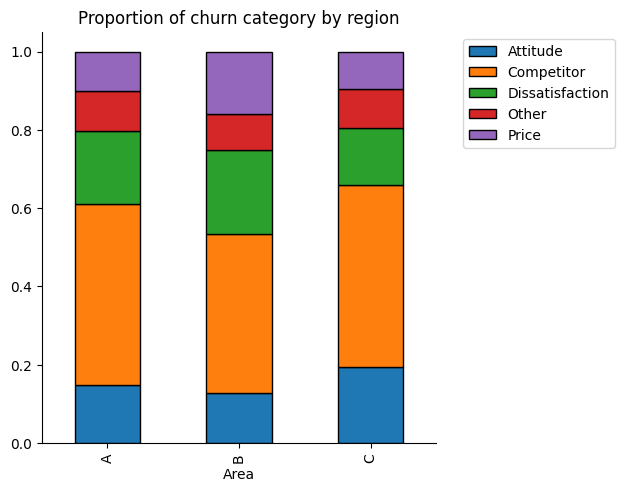

In [49]:
df_stacked_categories = df_churn_category_contingency.div(df_churn_category_contingency.sum(axis=1), axis=0)

fig, axs = plt.subplots()
df_stacked_categories.plot(
    kind='bar', 
    stacked=True, 
    edgecolor='black', 
    ax=axs
)
remove_spines(axs)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title('Proportion of churn category by region')
plt.show()

*Resgatar novos motivos utilizados na primeira versão*